In [5]:
import pandas as pd

# Load dataset
file_path = "../data/raw/training.1600000.processed.noemoticon.csv"
column_names = ["target", "id", "date", "flag", "user", "text"]
data = pd.read_csv(file_path, encoding='latin-1', names=column_names)

# Display the first few rows
data.head()


,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Check dataset size, column names, and types

In [6]:
data.info()
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
             target            id
count  1.600000e+06  1.600000e+06
mean   2.000000e+00  1.998818e+09
std    2.000001e+00  1.935761e+08
min    0.000000e+00  1.467810e+09
25%    0.000000e+00  1.956916e+09
50%    2.000000e+00  2.002102e+09
75%    4.000000e+00  2.177059e+09
max    4.000000e+00  2.329206e+09


Inspect missing values

In [7]:
data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

Visualize Sentiment Distribution

C:\Users\hatoui\AppData\Local\Temp\ipykernel_14000\2436165448.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="sentiment", palette="coolwarm")


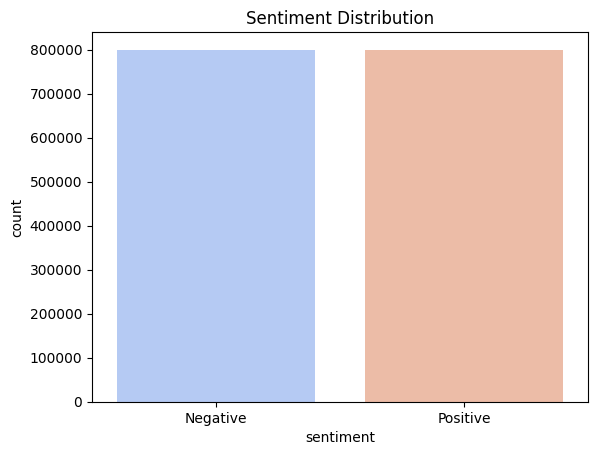

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert sentiment labels
sentiment_map = {0: "Negative", 2: "Neutral", 4: "Positive"}
data["sentiment"] = data["target"].map(sentiment_map)

# Plot distribution
sns.countplot(data=data, x="sentiment", palette="coolwarm")
plt.title("Sentiment Distribution")
plt.show()


Inspect Tweet Text

In [10]:
print(data["text"].sample(10))

568504     @JDollin The drink of my childhood, basically....
1186255    @BeateMacPack311 Ich habe es Ã¼brigens auch sc...
816437     @souljaboytellem http://twitpic.com/3izgy - i ...
1257870                   Home sweet home  I had a long day.
938923     Did a good deed today, found a phone, owner ca...
256213     @kimaglick  yeh...i'm still here petrifying......
222999     wishes she could watch ANTM on oxygen while ea...
1209162    @XXxWeHoLoVexXX Nothing's ever really sold out...
1173723    Done with church. Partay at 12:30. Im gonna mi...
450842     @latuacatante17 idk lol. my mom doesnt want to...
Name: text, dtype: object


Check for Imbalanced Data

In [11]:
print(data["sentiment"].value_counts())

sentiment
Negative    800000
Positive    800000
Name: count, dtype: int64


Clean Up Data

In [12]:
# Remove duplicates
data = data.drop_duplicates(subset="text")

# Remove neutral sentiments if imbalanced
data = data[data["sentiment"] != "Neutral"]

print("Cleaned dataset size:", data.shape)


Cleaned dataset size: (1581466, 7)


Save processed data

In [13]:
processed_file_path = "../data/processed/cleaned_sentiment140.csv"
data.to_csv(processed_file_path, index=False)
